# COGS 108 - Final Project 

# Overview

The intersection of crime and community can often be puzzling, bringing into question which influences the other more and positively or negatively? In this project, with public parks as a representation of a community, I aimed to understand how crime in public parks in the San Diego area affects its attractiveness to locals and tourists or vice versa. To do so, I analyzed the relationship between Yelp ratings of San Diego public parks and the number of police dispatches in the area around said parks. From this analysis, the data suggests that there is in fact no correlation between the park ratings and number of dispatched police calls, in fact they appear to be very disparate and unrelated.

# Name & GitHub

-  Name: Giselle Mejia
- GitHub Username: 9GCMEJIA

# Research Question

Is there a relationship between the frequency of police call dispatches in areas around San Diego public parks and the Yelp ratings of such associated parks?

## Background and Prior Work

San Diego Parks and Recreation accounts for overseeing nearly all public space including 40,000 acres of developed and undeveloped open space, 340 parks, 25 miles of shoreline, 57 recreation centers, 13 pools, 7 skate parks, 3 golf courses. Their overall mission is: "To provide healthy, sustainable, and enriching environments for all." Their vision on the other hand is "To connect all to the city’s diverse world class park system." In past studies, scholars have explored the relationship between park facilities, observed park use, and physical activity levels, but did not stray too far away to analyze the intersecting trends and consequences between the parks and the neighboring community. 

Yelp is a popular ratings and review platform for many public and private facilities and provides a good insight into the general community opinion of the local San Diego parks. This includes ratings on 5 star scale and written reviews.

While there are not many studies looking into the comparison of crime in public parks and data from the community (Yelp, in this case), there have been speculations and observations made claiming that parks act as crime inhibitors or generators. This notion relies on the idea that "nearby land uses and socio-demographic characteristics are a key driver of crime being located within the park or nearby the park." San Diego, specifically, has recently began instilling park curfews in response to many crime concerns around the Pacific Beach/Mission Bay area. Spiked crime in parks may dwell in the very nature that parks are public, available to all, and often unsupervised. On the otherhand, parks are also said to be very "critical" for low income or underprivileged communities, providing a free space to congregate or spend leisure time. Thus, in the eyes of the community parks can be a blessing or curse.


References:
- https://www.sandiego.gov/parks-and-recreation
- https://www.sandiegouniontribune.com/communities/san-diego/story/2020-02-16/park-curfews-on-the-rise-in-san-diego-in-response-to-crime-concerns
- https://www.sciencedirect.com/science/article/abs/pii/S0049089X18301303 
- https://js.sagamorepub.com/jpra/article/view/6078

# Hypothesis


I hypothesize that a higher frequency of local crime near San Diego public parks correlate to a lower Yelp rating, while lower frequencies will correlate to a higher rating. I predict this case because Yelp reviews are often both locals and tourists--everyday citizens--rather than official inspectors and thus they overlap with the population of locals who also make the police calls. This may point to a more negative outlook by the community who has to deal with the rampant crime.

# Dataset(s)

- Dataset Name: Dataset (CSV, Park Information): yelp_SD_parks.csv
- Source: Professor Ellis
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 834
This dataset includes general information about San Diego park names, addresses, phone numbers, and websites. It also includes the average numeric rating which we will use.


- Dataset Name: Dataset (CSV, 2019): pd_calls_for_service_2019_datasd.csv
- Source: Professor Ellis
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 590967
This dataset includes information about the calls dispatched by the SD Police Department, showing dates, addresses, call types, and priority levels. I am using data from only the year 2019 and not 2020 to get a better understanding without the possible factor of COVID-19 limitations and influences on the 2020 data.


To combine these datasets, I plan on merging all the information through the common name and address of the parks used in both sets--or more specifically the street name provided.


# Setup

In [1]:
# imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import requests

In [2]:
# read in csv to dataframes
parks_df = pd.read_csv('C:\\Users\\gcorp\\OneDrive\\Documents\\GitHub\\individual_fa20\\data\\yelp_SD_parks.csv')
police_calls_df = pd.read_csv('C:\\Users\\gcorp\\OneDrive\\Documents\\GitHub\\individual_fa20\\data\\pd_calls_for_service_2019_datasd.csv')

# Data Cleaning

To clean the datasets I removed all information I would not be dealing with such as the phone numbers, id's of parks, plus the date, time, and incident of each police call. I am essentially only focusing on addresses and the number of times a call was made to each address/street.

In [3]:
parks_df = parks_df.drop(['phone', 'id', 'url', 'review_count', 'longitude', 'latitude', 'is_closed'], axis=1)
police_calls_df = police_calls_df.drop(['incident_num', 'date_time', 'day_of_week', 'address_number_primary', 'address_dir_primary', 'call_type', 'disposition', 'beat', 'priority', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting'], axis=1)

To make sure each value was consistent and aligned, I made sure all strings were lower case and only pertained to the street name, thus removing most numbers, while combining addresses in the police calls dataframe to calculate the frequency in an added column I named num_dispatch

In [4]:
police_calls_df = police_calls_df.assign(address = police_calls_df['address_road_primary'] + ' ' + police_calls_df['address_sfx_primary'])
police_calls_df = police_calls_df.drop(['address_road_primary', 'address_sfx_primary'], axis=1)
police_calls_df = police_calls_df.assign(num_dispatch = 1)
police_calls_df = police_calls_df.groupby('address').agg({'num_dispatch':'sum'}).reset_index()
police_calls_df['address'] = police_calls_df['address'].str.lower()

parks_df['address'] = parks_df['address'].str.replace('\d+', '')
parks_df['address'] = parks_df['address'].str.lower()
parks_df['address'] = parks_df['address'].str.replace('san diego, ca', '')
parks_df['address'] = parks_df['address'].str.replace('coronado, ca', '')
parks_df['address'] = parks_df['address'].str.strip()


In [5]:
final_df = pd.merge(parks_df, police_calls_df, on = 'address')
final_df.head()

,name,address,rating,num_dispatch
0,Waterfront Park,pacific hwy,4.5,2053
1,Centrum Park,lightwave ave,3.5,162
2,Presidio Park,jackson st,4.5,176
3,White Deer Park,jackson st,5.0,176
4,Kate O Sessions Memorial Park,soledad rd,4.5,164


# Data Analysis & Results

To get a general idea of the trend of my data, I plotted histograms of each major variable--rating and number of dispatched calls.

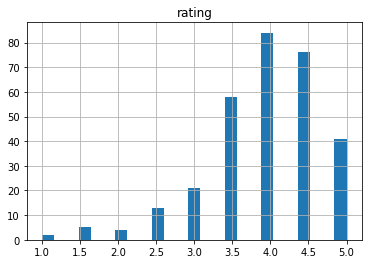

In [6]:
final_df.hist(column='rating', bins=25)

f1 = plt.gcf()

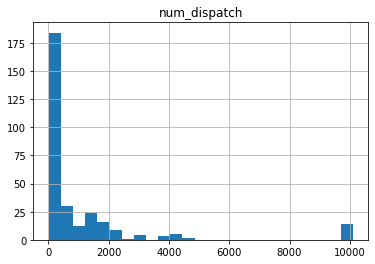

In [7]:
final_df.hist(column='num_dispatch', bins=25)

f2 = plt.gcf()

Scatter plot allows for a better visualization of each variable side by side 

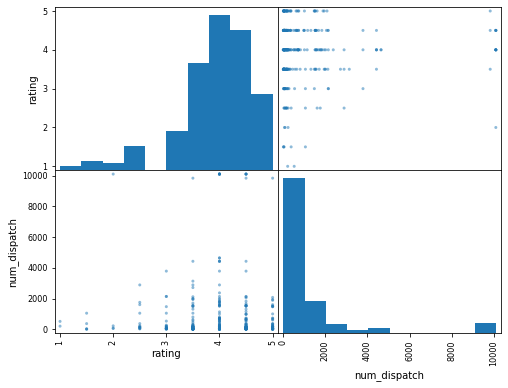

In [8]:
pd.plotting.scatter_matrix(final_df[['rating', 'num_dispatch']], figsize=(8,6))
f3 = plt.gcf()

In the following steps below, I find the general descriptive stats of my data and their pairwise correlations. The numbers themselves show no significance and to get a better understanding I also plot a linear regression for both with rating in relation to calls and vice versa with calls in relation to rating. Neither shows a linear relationship, or any at all.

In [10]:
desc = final_df.describe()
corrs = desc.corr('pearson')
desc

,rating,num_dispatch
count,304.000000,304.000000
mean,3.944079,1109.000000
std,0.789889,2185.154843
min,1.000000,2.000000
25%,3.500000,70.000000
50%,4.000000,215.500000
75%,4.500000,1356.250000
max,5.000000,10100.000000


In [11]:
corrs

,rating,num_dispatch
rating,1.000000,-0.186239
num_dispatch,-0.186239,1.000000


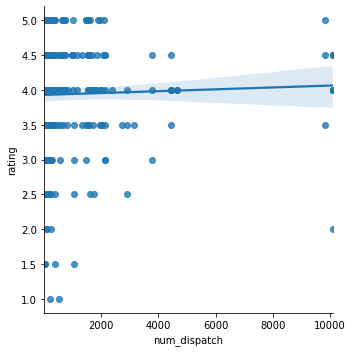

In [12]:
sns.lmplot(x='num_dispatch',y='rating',data=final_df,fit_reg=True) 

f4 = plt.gcf()

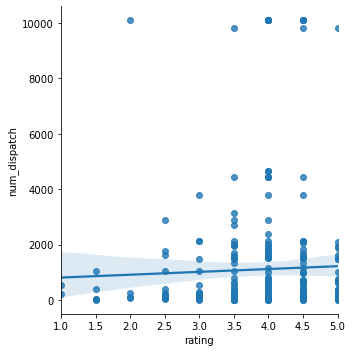

In [13]:
sns.lmplot(x='rating',y='num_dispatch',data=final_df,fit_reg=True) 

f5 = plt.gcf()

# Ethics & Privacy

The information by Yelp and the police department are public record and all individual names and identifiers for people are not present, thus giving any individuals involved privacy.

However, while my question does not directly involve any evident ethical steps, the misuse of such data can generate ethical and privacy concerns. The ethical ambiguity revolves around some implicit biases brought about by the data. This information can point out hotspots for crime in the San Diego area and thus bring about some stigmas against a neighborhood or peoples from such neighborhood.

There is also bias in our datasets themselves for it does not completely capture the public view only those who are involved in the community and online through Yelp. In addition, the police dispatch dataset deliberately leaves out data regarding sensitive incidents including "domestic violence, child abuse, suicide, sex crimes and stalking." Thus, we cannot get the entire picture by this data alone, but perhaps very close to it.

# Conclusion & Discussion

Based on this analysis, there appears to be no relationship between the amount of police calls dispatched to San Diego Parks and the Yelp rating of that park. In this case, my hypothesis is not accepted because San Diego parks with lower frequencies of police dispatch calls can also be associated with high ratings and vice versa. This would mean crime may not be a noteworthy factor in the community attraction of public parks--or a reflection of the community at all.

Limitations and challenges I encountered included in both the datasets I have and simply analyzing using a linear regression model. With more time on this project, it would have been very insightful to test multiple models and check for any significances. I would also get a better grasp on this research question if the data captured a larger breadth in its observations such as more users who rate the parks, not only through Yelp, and also all instances of police calls and not just the censored batch in the dataset we have. 

Another associated drawback comes from a large outlier in my police dispatch calls data where most parks were below 2000 calls, but one had around 10000. This would appear significant to explore, but I did not have the time and means. Overall, data cleaning was my biggest challenger trying to get all the data consistent and managable by the correlation calculations.